<a href="https://colab.research.google.com/github/adalves-ufabc/2024.Q2-PLN/blob/main/2024_Q2_PLN_AULA_10_Notebook_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2024-Q2]**
Prof. Alexandre Donizeti Alves

## ***Word Embeddings***
---



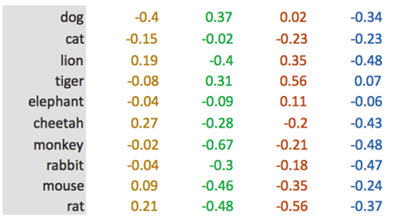

* Representações vetoriais de palavras densas (valores diferentes de 0).

* Assumem uma dimensão fixa (geralmente 300).

* Obtidos a partir de redes neurais.




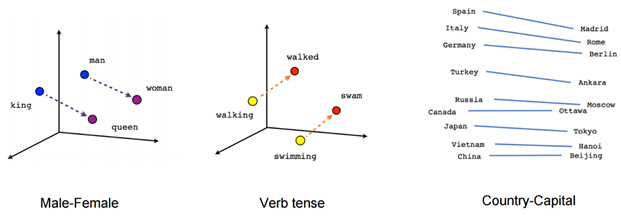

Hipoteticamente, permite inferências lógicas a partir de operações aritméticas em vetores (*v*):

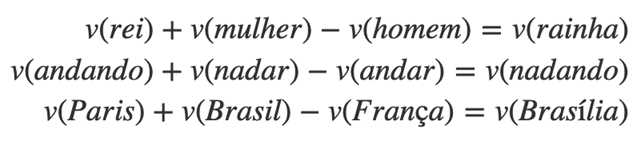

Baixando um modelo (pode levar alguns minutos):

In [ ]:
!wget http://143.107.183.175:22980/download.php?file=embeddings/word2vec/cbow_s50.zip
!unzip download.php?file=embeddings%2Fword2vec%2Fcbow_s50.zip

--2024-07-30 11:52:20--  http://143.107.183.175:22980/download.php?file=embeddings/word2vec/cbow_s50.zip
Connecting to 143.107.183.175:22980... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170360268 (162M) [application/octet-stream]
Saving to: ‘download.php?file=embeddings%2Fword2vec%2Fcbow_s50.zip’

download.php?file=e 100%[===================>] 162.47M  11.2MB/s    in 15s     

2024-07-30 11:52:36 (10.5 MB/s) - ‘download.php?file=embeddings%2Fword2vec%2Fcbow_s50.zip’ saved [170360268/170360268]

Archive:  download.php?file=embeddings%2Fword2vec%2Fcbow_s50.zip
  inflating: cbow_s50.txt            


Inicializando os *word embeddings*:

In [ ]:
from gensim.models import KeyedVectors

word2vec = KeyedVectors.load_word2vec_format('/content/cbow_s50.txt')

Acessando o *word embedding* da palavra *menino*:

In [ ]:
word2vec['menino']

array([ 0.047754, -0.190243,  0.290581,  0.035822,  0.2301  , -0.139099,
       -0.232351, -0.119084,  0.327645,  0.160017, -0.5318  ,  0.093309,
       -0.545777, -0.166715,  0.044872, -0.094386, -0.017529, -0.053898,
        0.189092, -0.233779, -0.302459,  0.707696, -0.146762,  0.258651,
        0.25436 , -0.071892,  0.132296, -0.072721,  0.162642,  0.348834,
        0.129191, -0.030967,  0.048024,  0.26683 , -0.076066,  0.352168,
        0.629779, -0.403468, -0.473612,  0.456509,  0.008285,  0.066872,
        0.082632, -0.128989,  0.107645,  0.119981,  0.219388, -0.141599,
       -0.20074 , -0.30657 ], dtype=float32)

Palavras mais semelhantes ao verbo *estudar*:

In [ ]:
word2vec.most_similar('estudar')

[('pesquisar', 0.8674625158309937),
 ('ensinar', 0.8485606908798218),
 ('leccionar', 0.8399008512496948),
 ('moldar', 0.8285380601882935),
 ('desenvolver', 0.8203483819961548),
 ('focalizar', 0.8188527226448059),
 ('cursar', 0.8175848126411438),
 ('projectar', 0.8173723816871643),
 ('desenhar', 0.8155598044395447),
 ('enriquecer', 0.8142802715301514)]

Vamos usar a similaridade de cosseno para calcular a proximidade entre palavras:

$\text{cos}(a,b) = \frac{a \cdot b}{||a|| \cdot  ||b||}$

Similaridade por cosseno entre os *word embeddings* das palavras *menino* e *cachorro*:

In [ ]:
import numpy as np

def cos(x1, x2):
  return np.dot(x1, x2)/(np.linalg.norm(x1)*np.linalg.norm(x2))

In [ ]:
cos(word2vec["menino"], word2vec["garoto"])

0.9269967

In [ ]:
word2vec.similarity('menino', 'garoto')

0.92699665

Inferência lógica para: *odiar* está para *odiando*, assim como *amar* está para...

In [ ]:
word2vec.most_similar(positive=['amar', 'odiando'], negative=['odiar'])

[('amando', 0.7472065687179565),
 ('desperto', 0.7231095433235168),
 ('quieto', 0.6835169196128845),
 ('tranqüilo', 0.6812532544136047),
 ('surdo', 0.6798273921012878),
 ('louco', 0.6784767508506775),
 ('quieta', 0.6757060289382935),
 ('sã³brio', 0.6748781204223633),
 ('rouco', 0.6719405651092529),
 ('sossegado', 0.6716687679290771)]

**Treinando um córpus**

In [ ]:
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

corpus = [
    "O gato está no telhado",
    "O cachorro está no quintal",
    "O pássaro está na árvore",
    "O peixe está no aquário",
    "O gato e o cachorro são animais de estimação"
]

# Pré-processamento do corpus
processed_corpus = [simple_preprocess(doc) for doc in corpus]

# Treinamento do modelo Word2Vec
modelo = Word2Vec(sentences=processed_corpus, vector_size=300, window=5, min_count=1, workers=4)

O modelo **Word2Vec** é treinado com o córpus processado.

`vector_size`=300: define a dimensionalidade dos vetores de palavra.

`window`=5: define a janela de contexto para considerar palavras ao redor da palavra de interesse.

`min_count`=1: inclui todas as palavras que aparecem pelo menos uma vez no córpus.

`workers`=4: usa 4 threads para treinamento paralelo.

In [ ]:
# Obtenção do vetor de uma palavra
palavra = "gato"
vetor = modelo.wv[palavra]
print(f"Vetor da palavra '{palavra}':\n{vetor}\n")

Vetor da palavra 'gato':
[-1.7187477e-03 -2.2227792e-03 -2.5922784e-03  2.7702427e-03
 -6.6078064e-04 -2.2849878e-03 -1.3847963e-03  1.7147087e-03
 -9.5637876e-04 -1.2498867e-03  5.4047507e-04 -9.2543126e-04
 -5.2812020e-04  3.5816390e-04 -9.9264819e-04  2.8397609e-03
  1.3036450e-03 -3.3196211e-03  2.0865332e-03 -2.2514181e-03
  2.5647759e-04  1.4680783e-03 -1.7011249e-03 -7.0355652e-04
  2.6984930e-03 -1.4145974e-03 -2.5454203e-03  3.0859709e-03
 -7.1849901e-04 -1.5731442e-03  2.8569333e-03  1.4277796e-03
  1.4416123e-03  3.0948378e-03 -2.8176936e-03  1.7517734e-03
  6.7978381e-04  1.3960934e-03  5.6596677e-04  1.4880446e-03
  1.4954301e-03  2.0348406e-03 -1.0673658e-03 -1.5252427e-03
 -1.4217218e-04  8.4457797e-04 -1.0877224e-03  2.0192394e-03
  1.3847101e-03  2.5881974e-03  8.5642416e-04  2.7055610e-03
 -4.6240329e-04  2.6926426e-03  1.2390054e-03 -2.6824414e-03
 -1.3112049e-03 -8.2395953e-04  1.6310147e-03 -2.9071968e-04
 -9.4363611e-04  2.6112357e-03  3.1076337e-03 -5.3830940e-04

In [ ]:
len(vetor)

300

In [ ]:
# Encontrar palavras mais semelhantes a 'gato'
palavras_similares = modelo.wv.most_similar(palavra, topn=5)
print(f"Palavras mais semelhantes a '{palavra}':\n{palavras_similares}\n")

Palavras mais semelhantes a 'gato':
[('está', 0.08134528994560242), ('animais', 0.07046208530664444), ('árvore', 0.06809812784194946), ('cachorro', 0.05000334605574608), ('telhado', 0.040474556386470795)]



In [ ]:
# Salvar o modelo treinado
modelo.save("word2vec.model")

In [ ]:
# Carregar o modelo salvo
modelo_salvo = Word2Vec.load("word2vec.model")

# Usar o modelo carregado
palavras = modelo_salvo.wv.most_similar(palavra, topn=5)
print(f"Palavras mais semelhantes a '{palavra}' (usando o modelo carregado):\n{palavras}\n")

Palavras mais semelhantes a 'gato' (usando o modelo carregado):
[('está', 0.08134528994560242), ('animais', 0.07046208530664444), ('árvore', 0.06809812784194946), ('cachorro', 0.05000334605574608), ('telhado', 0.040474556386470795)]



***Word embeddings*** de primeira geração são livres de contexto, i.e. cada palavra é representada por um vetor independente do contexto onde se encontra.

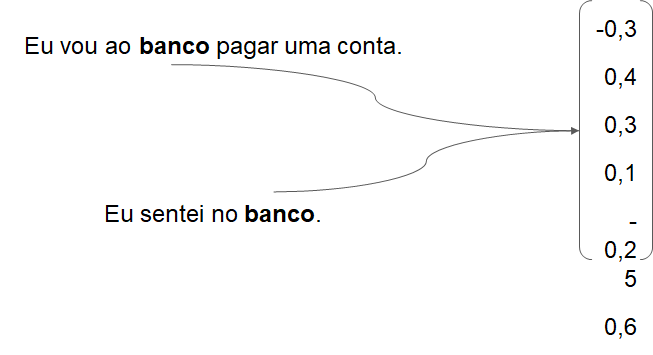

**Referência:**

Parte desse Notebook foi adaptado a partir dos slides do curso online Linguística Computacional elaborado por discentes e docentes do Departamento de Ciência da Computação da UFMG, gentilmente cedido pelo professor **Thiago Castro Ferreira**.




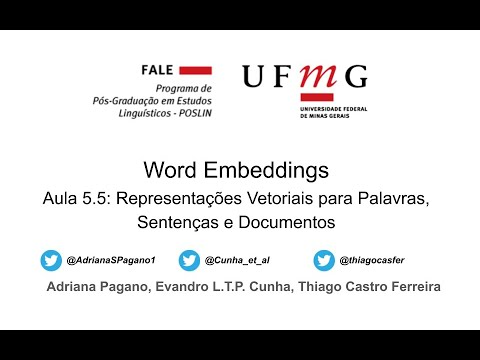

In [ ]:
from IPython import display

#https://youtu.be/DAooqHM0cOg?si=0A4cAucigqXI5maZ

display.YouTubeVideo('DAooqHM0cOg')
